# Исследование закономерностей, определяющих успешность компьютерных игр

---



В нашем распоряжении есть данные о продажах игр. По ним следует определить закономерности, определяющие успешность игр для дальнейшего планирования рекламных компаний интернет-магазина, продающего компьютерные игры.

## Цели
 - Определить, какие факторы влияют на успешность игры

## План работы
 - Загрузить данные и изучить их
 - Подготовить данные для анализа, проверить наличие пропусков, дубликатов, выбросов и устранить их, если они есть
 - Провести анализ данных, определить какие игры в какое время выпускались, продажи каких игр росли или падали, какое влияние имели отзывы критиков и пользователей и какие жанры считаются популярными.
 - Создать портрет среднестатистического пользователя
 - Сформулировать и проверить гипотезы
 - Сделать выводы о главных факторах, влияющих на успешность игр

### Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
from matplotlib import pyplot as plt

In [ ]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    print('Не удалось открыть файл')

In [ ]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
data.info()

print('Длина датафрейма:',len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Длина датафрейма: 16715


Имеем таблицу с 11-ю столбцами и 16715 строками. В ней хранятся данные о названии игр, платформе, для которой они выпускались, их жанре, количество проданных копий в Северной Америке, Японии, Европе и других странах в миллионах, а также данные об оценке пользователей, экспертов и о возрастной категории.

Данные с годом выпуска типа float, было бы логично сделать их типа int.

Данные об оценках пользователей в формате object, но поскольку это числа, для работы с ними нужно преобразовать их в формат float.

### Предобработка данных

In [ ]:
data.columns = data.columns.str.lower()

data['name'] = data['name'].str.lower()

data['platform'] = data['platform'].str.lower()

data['genre'] = data['genre'].str.lower()


data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
display(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропусков в названиях игр, годе выпуска и в жанре мало, поэтому можно удалить без значительных потерь.

In [ ]:
data = data.dropna(subset=['name','year_of_release','genre'])


Пропуски в оценках критиков и пользователей будем заполнять медианой.

Преобразуем данные для заполнения пропусков.

TBD (to be determined) означает, что оценки ещё нет, поэтому преобразуем строки со статусом tbd в nan и заполним пропуски медианой.

In [ ]:
print(data[data['user_score']=='tbd']['user_score'].count())

data['user_score'] = data['user_score'].replace({'tbd': np.nan})


2376


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [ ]:
data = data.astype({'user_score':'float'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Будем считать, что пропуски означают, что игра либо предназначена для всех возрастов, либо ей ещё не присвоена категория, то есть категория RP.

In [ ]:
data[data['rating'].isna()].groupby('genre')['name'].count()

genre
action          1161
adventure        853
fighting         405
misc             859
platform         317
puzzle           233
racing           370
role-playing     711
shooter          300
simulation       298
sports           828
strategy         341
Name: name, dtype: int64

Пропуски для игр жанра action, adventure, fighting, shooter заполним категорией RP, а всё остальное - категорией E, как игры, доступные для всех возрастов.

In [ ]:
data.loc[(data['genre']=='action')|(data['genre']=='adventure')|(data['genre']=='fighting')|\
         (data['genre']=='shooter'),'rating'] = data.loc[(data['genre']=='action')|(data['genre']=='adventure')|\
                                                         (data['genre']=='fighting')|(data['genre']=='shooter'),\
                                                         'rating'].fillna('RP')

data['rating'] = data['rating'].fillna('E')

print(data['rating'].isna().sum())

0


In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [ ]:
data['total_income'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,E,31.38


In [ ]:
data = data[(data['total_income']>=0.025)|(data['critic_score'].isna()==False)]

print(data[data['total_income']<=8]['user_score'].median())

7.5


In [ ]:
def categorize_by_income(income):
    if 0 <= income <= 0.01:
        return 'very_low'
    if 0.01 < income <= 2:
        return  'low'
    if 2 < income <= 5:
        return  'medium'
    if 5 < income <= 7:
        return  'high'
    if income > 7:
        return 'higher'

data['game_category'] = data['total_income'].apply(categorize_by_income)

data.loc[data['game_category']=='very_low','user_score'] = data.loc[data['game_category']=='very_low','user_score'].fillna(data[data['game_category']=='very_low']['user_score'].median())
data.loc[data['game_category']=='low','user_score'] = data.loc[data['game_category']=='low','user_score'].fillna(data[data['game_category']=='low']['user_score'].median())
data.loc[data['game_category']=='medium','user_score'] = data.loc[data['game_category']=='medium','user_score'].fillna(data[data['game_category']=='medium']['user_score'].median())
data.loc[data['game_category']=='high','user_score'] = data.loc[data['game_category']=='high','user_score'].fillna(data[data['game_category']=='high']['user_score'].median())
data.loc[data['game_category']=='higher','user_score'] = data.loc[data['game_category']=='higher','user_score'].fillna(data[data['game_category']=='higher']['user_score'].median())

print(data['user_score'].isna().sum())


0


Решил разбить игры на классы по продажам и пропуски заполнить медианой для каждой группы.



In [ ]:
data.loc[data['user_score'] <= 4,'critic_score'] = data.loc[data['user_score'] <= 4,'critic_score'].fillna(data[data['user_score'] <= 4]['critic_score'].quantile(0.25))
data.loc[(data['user_score'] > 4) & (data['user_score'] <= 7),'critic_score'] = data.loc[(data['user_score'] > 4) & (data['user_score'] <= 7),'critic_score'].fillna(data[(data['user_score'] > 4) & (data['user_score'] <= 7)]['critic_score'].quantile(0.65))
data.loc[data['user_score'] > 7,'critic_score'] = data.loc[data['user_score'] > 7,'critic_score'].fillna(data[data['user_score'] > 7]['critic_score'].quantile(0.85))


print(data['critic_score'].isna().sum())

0


Решил разбить игры по оценкам пользователей. Пропуски в оценках критиков с самыми низкими оценками пользователей заполняю первым квартилем оценок критиков, со средними оценками - 65% процентилем, с самыми высокими оценками - 85% процентилем.

In [ ]:
data['user_score'].isna().sum()

display(data[data['user_score'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income,game_category


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

In [ ]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [ ]:
data = data.drop_duplicates(subset=['name','platform','total_income']).reset_index(drop=True)

Пропуски в названии и жанре могли появиться из-за какой-то ошибки при составлении таблицы.

Из-за того, что большинство игр, у которых были пропуски в оценках пользователей и критиков, не были очень популярны, пропуски могли означать, что оценок в принципе для этих игр не было.

Пропуски в возрастной категории могли значить, что игры предназначены либо для всех возрастов, либо категории нет (то есть, RP)

### Исследование данных

Text(0.5, 1.0, 'number_of_sales_graph')

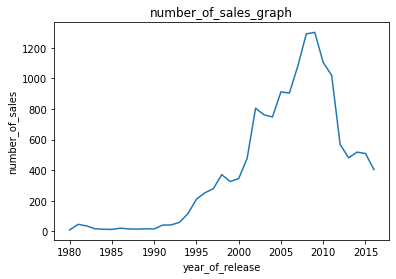

In [ ]:
data.groupby('year_of_release')['name'].count().plot()

plt.xlabel('year_of_release')
plt.ylabel('number_of_sales')
plt.title('number_of_sales_graph')

С 1980 года до примерно 1993-ого игр выпускалось мало, до 100 штук в год. После 93-его года выпуск игр начал расти, и больше всего игр выпускалось в районе 2010 года, их было выпущено около 1400. После 2010-ого года выпуск игр начал замедляться и к 2015 упал до 500.

In [ ]:
data.groupby('year_of_release')['name'].count().describe()

count      37.000000
mean      409.378378
std       410.656409
min         9.000000
25%        36.000000
50%       326.000000
75%       748.000000
max      1301.000000
Name: name, dtype: float64

Text(0, 0.5, 'number_of_sales')

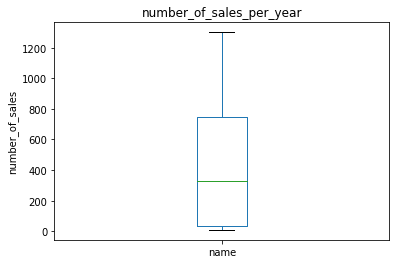

In [ ]:
data.groupby('year_of_release')['name'].count().plot.box()
plt.title('number_of_sales_per_year')
plt.ylabel('number_of_sales')

Аномально больших или малых значений нет, поэтому данные за все периоды важны.

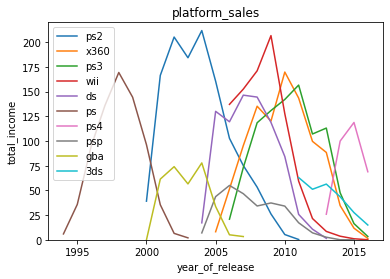

In [ ]:
#print(data.groupby('platform')['total_income'].sum().sort_values(ascending=False))

popular_platforms = ['ps2','x360','ps3','wii','ds','ps','ps4','psp','gba','3ds']
for platforms in popular_platforms:
    data[data['platform']==platforms].groupby('year_of_release')['total_income'].sum().plot()
    plt.legend(popular_platforms)
    plt.title('platform_sales')
    plt.ylim([0,220])
    plt.xlabel('year_of_release')
    plt.ylabel('total_income')

Из графиков видим, что в начале 2000-ых начинает расти популярность компьютерных игр, начинает появляться много платформ. Пик продаж приходится на промежуток между 2005 и 2010 годами, после чего количество продаж начинает спадать и к 2016 году падает почти до нуля.

Игры на большинство платформ продаются в основном 10 лет, после чего почти перестают продаваться.

In [ ]:
for platforms in popular_platforms:
    print(f'{platforms}:',data[data['platform'] == platforms]['year_of_release'].sort_values().unique())
    print('Количество лет, в течение которых выпускались игры на платформу:',\
          data[data['platform'] == platforms]['year_of_release'].sort_values().unique()[-1]-data[data['platform'] == platforms]\
          ['year_of_release'].sort_values().unique()[0])

ps2: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011]
Количество лет, в течение которых выпускались игры на платформу: 11
x360: [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
Количество лет, в течение которых выпускались игры на платформу: 11
ps3: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
Количество лет, в течение которых выпускались игры на платформу: 10
wii: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
Количество лет, в течение которых выпускались игры на платформу: 10
ds: [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013]
Количество лет, в течение которых выпускались игры на платформу: 9
ps: [1994 1995 1996 1997 1998 1999 2000 2001 2002 2003]
Количество лет, в течение которых выпускались игры на платформу: 9
ps4: [2013 2014 2015 2016]
Количество лет, в течение которых выпускались игры на платформу: 3
psp: [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
Количество лет, в течение которых выпускались игры на платформ

В среднем старые платформы живут примерно 10 лет.

Актуальным периодом можно назвать период между ~~2010-ым~~ 2013-ым и 2016-ым годами из-за количества платформ, для которых продаются игры.

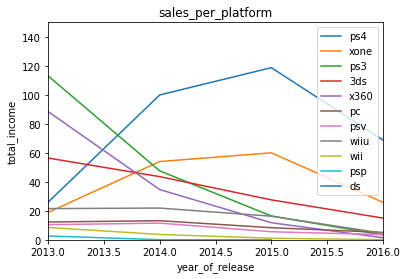

In [ ]:
data_cut = data[data['year_of_release']>=2013]
#display(data_cut.groupby('platform')['total_income'].sum().sort_values(ascending=False))


popular_platforms_new = ['ps4','xone','ps3','3ds','x360','pc','psv','wiiu','wii','psp','ds']

for platforms in popular_platforms_new:
    data_cut[data_cut['platform']==platforms].groupby('year_of_release')['total_income'].sum().plot()
    plt.legend(popular_platforms_new)
    plt.title('sales_per_platform')
    plt.xlabel('year_of_release')
    plt.xlim([2013,2016])
    plt.ylim([0,150])
    plt.ylabel('total_income')

Самыми актуальными являются ps4, xone и 3ds. Продажи игр на остальных платформах меньше, продажи сосредоточены около нуля. Однако продажи игр на wiiu, pc, psv долгое время не менялись, поэтому можно считать их потенциально прибыльными.

In [ ]:
for platforms in ['ps4','xone','wiiu','pc','3ds']:
    print(f'{platforms}:',data_cut.query('platform==@platforms').\
          groupby('year_of_release')['total_income'].sum())

ps4: year_of_release
2013     25.99
2014     99.99
2015    118.81
2016     68.93
Name: total_income, dtype: float64
xone: year_of_release
2013    18.96
2014    54.05
2015    60.08
2016    25.95
Name: total_income, dtype: float64
wiiu: year_of_release
2013    21.59
2014    21.95
2015    16.33
2016     4.59
Name: total_income, dtype: float64
pc: year_of_release
2013    12.33
2014    13.25
2015     8.41
2016     5.17
Name: total_income, dtype: float64
3ds: year_of_release
2013    56.46
2014    43.64
2015    27.63
2016    15.06
Name: total_income, dtype: float64


Самой популярной платформой на 2016 год является ps4 - 68.93 миллионов продаж. Игры на остальных платформах сильно отстают в продажах.

У xone на 2016 год 25.95 миллионов продаж, у 3ds - 15.06 миллионов, у pc - 5,17, у wiiu - 4.59 миллиона.

На момент 2016-ого года самыми популярными платформами были ps4, xone, 3ds, поэтому можно считать, что они будут прибыльными.
Игры на ps3, x630, wii, psp продавались в сравнимых количествах, а игры на платформы как ds, ps2, ps и gba перестали продаваться.

Игры на pc, wiiu, psv продавались значительно меньше, чем ps4 и xone, около 5 миллионов копий, но продажи игр на эти платформы менялись не значительно, и вероятно не будут меняться еще какое-то время, поэтому можно считать эти платформы тоже прибыльными.

Игры на некоторые платформы, например, на psp, gba, ds и ps2 перестали продаваться до 2015, поэтому не могут быть прибыльными.

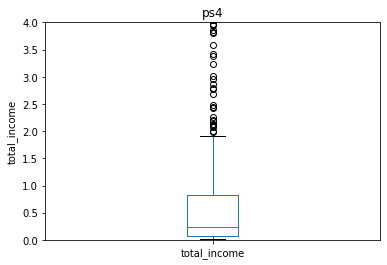

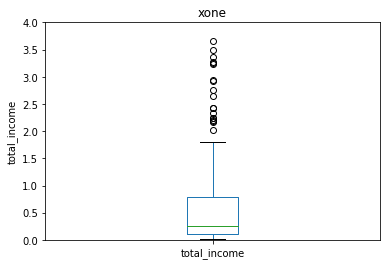

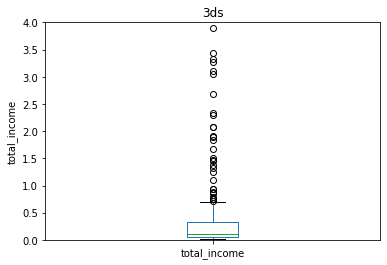

In [ ]:
top_platforms = ['ps4','xone','3ds']

for platforms in top_platforms:
    data_cut[data_cut['platform']==platforms]['total_income'].plot.box()
    plt.title(platforms)
    plt.ylabel('total_income')
    plt.ylim(0,4)
    plt.show()

count    365.000000
mean       0.859507
std        1.653268
min        0.010000
25%        0.070000
50%        0.240000
75%        0.820000
max       14.630000
Name: total_income, dtype: float64

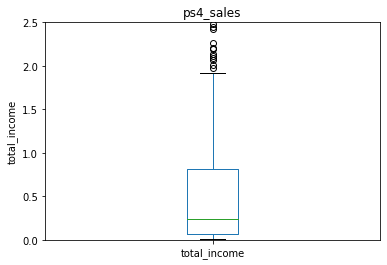

count    225.000000
mean       0.706844
std        1.065795
min        0.010000
25%        0.100000
50%        0.260000
75%        0.790000
max        7.390000
Name: total_income, dtype: float64


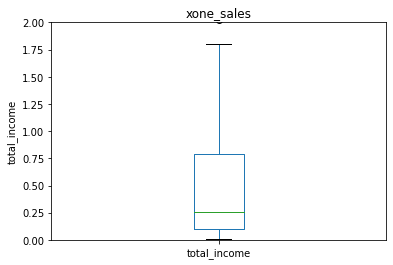

count    269.000000
mean       0.530818
std        1.456040
min        0.010000
25%        0.060000
50%        0.110000
75%        0.320000
max       14.600000
Name: total_income, dtype: float64


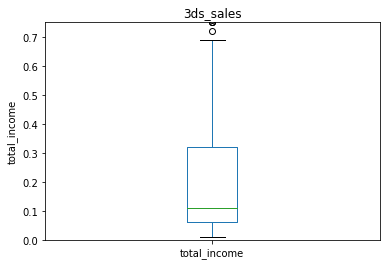

In [ ]:
data_cut[data_cut['platform']=='ps4']['total_income'].plot.box()
display(data_cut[data_cut['platform']=='ps4']['total_income'].describe())
plt.title('ps4_sales')
plt.ylabel('total_income')
plt.ylim([0,2.5])
plt.show()


data_cut[data_cut['platform']=='xone']['total_income'].plot.box()
print(data_cut[data_cut['platform']=='xone']['total_income'].describe())
plt.title('xone_sales')
plt.ylabel('total_income')
plt.ylim([0,2])
plt.show()

data_cut[data_cut['platform']=='3ds']['total_income'].plot.box()
print(data_cut[data_cut['platform']=='3ds']['total_income'].describe())
plt.title('3ds_sales')
plt.ylabel('total_income')
plt.ylim([0,0.75])
plt.show()

Больше всего выбросов у ps4 и 3ds, меньше всего - у xone. У ps4 и xone максимальные значения по диаграмме размаха - примерно 2, у 3ds меньше всего - примерно 0.7. Медиана больше всего у xone и ps4, примерно 0.25, меньше всего у pc - примерно 0.1.

Для xone, ps4, wiiu максимальные значения продаж  - примерно 1.5 миллиона. Для остальных - примерно 0.5 миллиона.

Больше всего выбросов у pc, меньше всего у wiiu.

Далее избавимся от выбросов.

In [ ]:
arr1 = data_cut[(data_cut['total_income']<data_cut['total_income'].quantile(0.75)\
             +1.5*st.iqr(data_cut['total_income']))&(data_cut['platform']=='ps4')]
arr2 = data_cut[(data_cut['total_income']<data_cut['total_income'].quantile(0.75)\
             +1.5*st.iqr(data_cut['total_income']))&(data_cut['platform']=='xone')]
arr3 = data_cut[(data_cut['total_income']<data_cut['total_income'].quantile(0.75)\
             +1.5*st.iqr(data_cut['total_income']))&(data_cut['platform']=='3ds')]

0.20735875167141762

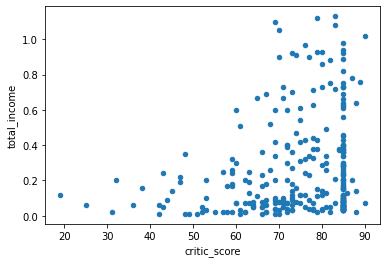

In [ ]:
arr1[arr1['platform'] =='ps4'].plot(x='critic_score',y='total_income',kind='scatter')

arr1[arr1['platform']=='ps4']['total_income'].corr(arr1['critic_score'])

0.019849173289819274

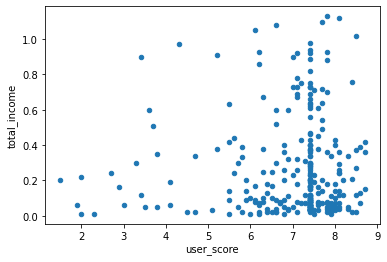

In [ ]:
arr1[arr1['platform'] =='ps4'].plot(x='user_score',y='total_income',kind='scatter')

arr1[arr1['platform']=='ps4']['total_income'].corr(data_cut['user_score'])

Корреляция между продажами и отзывами критиков примерно 0.25. Значит, можно полагать, что хорошие отзывы об играх побуждают игроков купить игру.

Корреляция между продажами и отзывами пользователей близка к нулю, примерно равна -0.02.

In [ ]:
print('Корреляция для xone:',arr2[arr2['platform']=='xone']['total_income'].corr\
      (arr2['critic_score']), arr2[arr2['platform']=='xone']['total_income'].corr(arr2['user_score']))
print('Корреляция для 3ds:',arr3[arr3['platform']=='3ds']['total_income'].corr\
      (arr3['critic_score']),arr3[arr3['platform']=='3ds']['total_income'].corr(arr3['user_score']))

Корреляция для xone: 0.2588411362306294 -0.01782985807892934
Корреляция для 3ds: -0.13123747234556055 -0.07535057136460126


Корреляция между продажами и оценками критиков для игр на ps4 примерно равна 0.2, для xone - 0.25, для pc - -0.13.

Корреляции между продажами и оценками пользователей для всех платформ близка к нулю.

Корреляция для xone между продажами и оценками критиков примерно 0.32, а корреляция между продажами и оценками пользователей примерно -0.06. Корреляции между продажами и отзывами критиков и пользователей для wiiu близки, примерно 0.3 и 0.21 соответственно.

Отрицательные значения могли получиться из-за каких-то выбросов. Но поскольку значения корреляций малы, не будем обращать внимание на знак.

genre
action          320.01
adventure        22.18
fighting         35.21
misc             62.37
platform         42.61
puzzle            3.13
racing           39.84
role-playing    145.68
shooter         232.87
simulation       21.60
sports          150.41
strategy          9.96
Name: total_income, dtype: float64

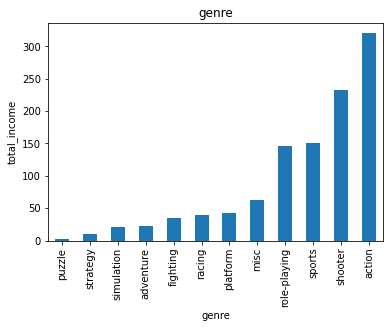

In [ ]:
data_cut.groupby('genre')['total_income'].sum().sort_values(ascending=True).plot(kind='bar')
plt.title('genre')
plt.ylabel('total_income')
data_cut.groupby('genre')['total_income'].sum()

Самыми прибыльными жанрами являются action, sports, shooter, их продали всего 1716.52 миллиона копий, 1309.67 миллиона, 1041.36 миллиона соответственно.

Хуже всего продаются жанры strategy(172.57 миллиона), fighting(442.66), puzzle(239.89).

In [ ]:
data_cut.groupby('genre')['total_income'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
action,642.0,0.498458,1.355929,0.01,0.0600,0.150,0.4400,21.05
adventure,148.0,0.149865,0.265520,0.01,0.0300,0.060,0.1300,1.66
fighting,74.0,0.475811,1.083767,0.02,0.0700,0.140,0.3375,7.55
misc,127.0,0.491102,1.095776,0.01,0.0600,0.180,0.4150,9.18
platform,72.0,0.591806,0.812403,0.01,0.0900,0.245,0.6450,4.32
puzzle,14.0,0.223571,0.348902,0.01,0.0425,0.085,0.1100,1.19
racing,80.0,0.498000,0.986982,0.01,0.0500,0.130,0.4150,7.09
role-playing,279.0,0.522151,1.380303,0.01,0.0600,0.150,0.4050,14.60
shooter,180.0,1.293722,2.038083,0.01,0.1725,0.505,1.5475,14.63


Text(0, 0.5, 'total_income')

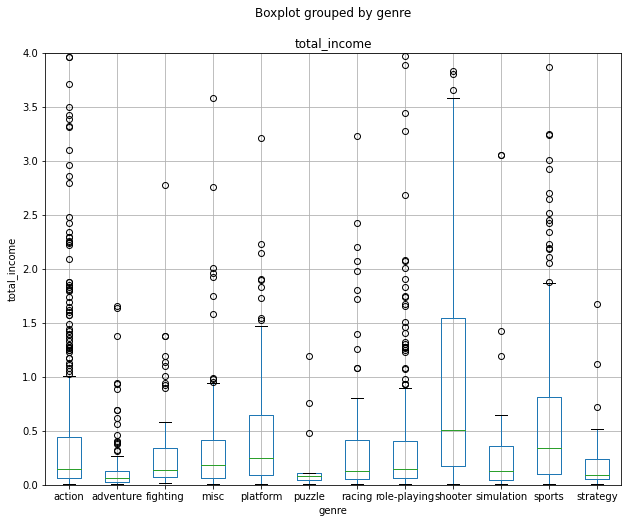

In [ ]:
data_cut.boxplot(column='total_income',by='genre',figsize=(10,8))
plt.ylim([0,4])
plt.ylabel('total_income')

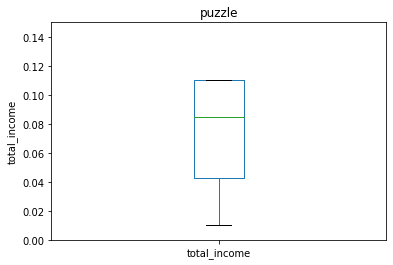

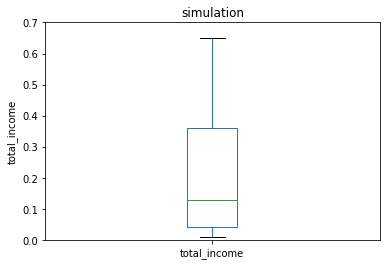

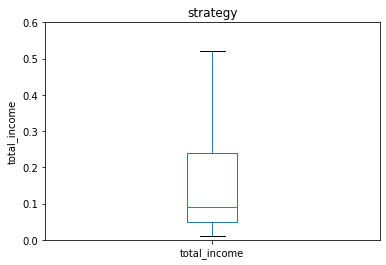

In [ ]:
data_cut[(data_cut['genre']=='puzzle')]['total_income'].plot.box()
plt.ylabel('total_income')
plt.ylim([0,0.15])
plt.title('puzzle')
plt.show()

data_cut[(data_cut['genre']=='simulation')]['total_income'].plot.box()
plt.ylabel('total_income')
plt.ylim([0,0.7])
plt.title('simulation')
plt.show()

data_cut[(data_cut['genre']=='strategy')]['total_income'].plot.box()
plt.ylabel('total_income')
plt.ylim([0,0.6])
plt.title('strategy')
plt.show()

Медианы выше всего у жанров platform, shooter, sports (0.25, 0.5, 0.3 миллионов соответственно). Меньше всего медианы у adventure, strategy, puzzle - 0.06, 0.09, 0.85 соответственно.
    


### Портрет среднестатистического пользователя

,na_sales
platform,
ps4,108.64
xone,92.97
x360,81.59
ps3,63.47
3ds,38.13


Всего продаж: na_sales    384.8
dtype: float64


,eu_sales
platform,
ps4,141.01
ps3,67.66
xone,51.47
x360,42.39
3ds,30.81


Всего продаж eu_sales    333.34
dtype: float64


,jp_sales
platform,
3ds,67.57
ps3,22.81
psv,17.02
ps4,15.72
wiiu,10.83


Всего продаж jp_sales    133.95
dtype: float64


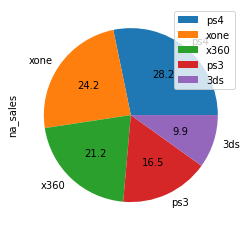

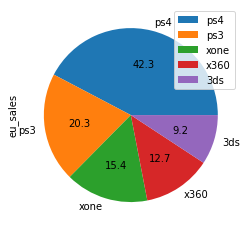

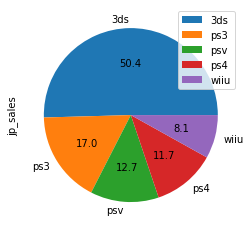

In [ ]:
display(data_cut.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)[:5])
data_cut.pivot_table(index='platform',values='na_sales',\
                 aggfunc='sum').sort_values(by='na_sales',ascending=False)[:5].plot.pie(y='na_sales',autopct='%.1f')
print('Всего продаж:',data_cut.pivot_table\
      (index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)[:5].sum())



display(data_cut.pivot_table(index='platform',\
                         values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)[:5])
data_cut.pivot_table(index='platform',values='eu_sales',\
                 aggfunc='sum').sort_values(by='eu_sales',ascending=False)[:5].plot.pie(y='eu_sales',autopct='%.1f')
print('Всего продаж',data_cut.pivot_table\
      (index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)[:5].sum())



display(data_cut.pivot_table(index='platform',\
                         values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)[:5])
data_cut.pivot_table(index='platform',values='jp_sales',\
                 aggfunc='sum').sort_values(by='jp_sales',ascending=False)[:5].plot.pie(y='jp_sales',autopct='%.1f')
print('Всего продаж',data_cut.pivot_table(index='platform',\
                                      values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)[:5].sum())

Самой популярной платформой в Северной Америке является ps4, состовляет примерно 28.2 процентов от продаж игр на пяти самых популярных платформах. В Европе самая популярная платформа - ps4, составляет 42.3 процента, в Японии - 3ds, состовляет 50.4 процента.
    
Наименее популярная платформа в Америке и в Европе - 3ds(9.9%), в Японии - wiiu(8.1%)
    
    
Общее количество продаж больше всего в Северной Америке, меньше всего - в Японии.
    


Самой популярной платформой в Северной Америке является x360, состовляет примерно 33.4 процентов от продаж игр на пяти самых популярных платформах. В Европе самая популярная платформа - ps3, составляет 30,2 процента, в Японии - 3ds, состовляет 47.5 процента.

Наименее популярная платформа в Америке - 3ds(12.2%), в Европе - pc(10.5%), в Японии - ps4(7.5%)

Общее количество продаж больше всего в Северной Америке, меньше всего - в Японии.

,na_sales
genre,
action,125.87
shooter,109.67
sports,65.24
role-playing,46.40
misc,27.38


Всего продаж: na_sales    374.56
dtype: float64


,eu_sales
genre,
action,117.65
shooter,87.84
sports,60.33
role-playing,36.96
racing,20.14


Всего продаж eu_sales    322.92
dtype: float64


,jp_sales
genre,
role-playing,50.84
action,39.29
misc,8.94
fighting,7.55
shooter,6.59


Всего продаж jp_sales    113.21
dtype: float64


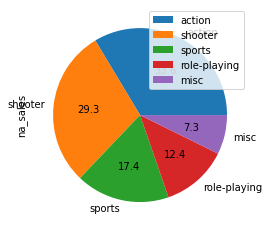

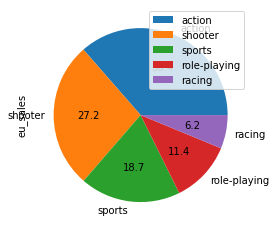

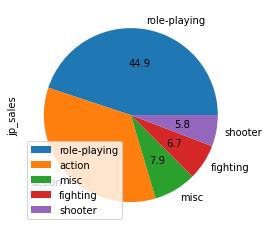

In [ ]:
display(data_cut.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values\
        (by='na_sales',ascending=False)[:5])
data_cut.pivot_table(index='genre',values='na_sales',\
                                               aggfunc='sum').sort_values(by='na_sales',\
                                                                          ascending=False)[:5].plot.pie(y='na_sales',autopct='%.1f')
print('Всего продаж:',data_cut\
      .pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)[:5].sum())



display(data_cut.pivot_table(index='genre',values='eu_sales',aggfunc='sum').\
        sort_values(by='eu_sales',ascending=False)[:5])
data_cut.pivot_table(index='genre',values='eu_sales',aggfunc='sum').\
sort_values(by='eu_sales',ascending=False)[:5].plot.pie(y='eu_sales',autopct='%.1f')
print('Всего продаж',data_cut.pivot_table(index='genre',values='eu_sales',aggfunc='sum').\
      sort_values(by='eu_sales',ascending=False)[:5].sum())



display(data_cut.pivot_table(index='genre',values='jp_sales',aggfunc='sum').\
        sort_values(by='jp_sales',ascending=False)[:5])
data_cut.pivot_table(index='genre',values='jp_sales',aggfunc='sum').\
sort_values(by='jp_sales',ascending=False)[:5].plot.pie(y='jp_sales',autopct='%.1f')
print('Всего продаж',data_cut.pivot_table(index='genre',values='jp_sales',\
                                                                    aggfunc='sum').sort_values(by='jp_sales',ascending=False)[:5].sum())

В Северной Америке и Европе самым популярным жанром является action (36.6%, 36.4%), в Японии - role-playing  44.9%.

В Америке наименее популярный жанр misc(7.3%), в Европе - racing(6.2%), в Японии - shooter(5.8%).    


В Северной Америке самым популярным жанром является shooter (33,6%), Европе - action (37%). В Японии самым популярным жанром является role-playing, составляет 43%.

В Америке наименее популярный жанр misc(10.1%), в Европе - racing(7.5%), в Японии - platform(6.5%).


,na_sales
rating,
M,165.16
E,121.42
E10+,54.22
T,49.69
RP,46.68


Всего продаж: na_sales    437.17
dtype: float64


,eu_sales
rating,
M,145.31
E,121.35
E10+,42.61
T,41.88
RP,40.06


Всего продаж eu_sales    391.21
dtype: float64


,jp_sales
rating,
E,65.55
RP,31.42
T,20.55
M,14.11
E10+,5.89


Всего продаж jp_sales    137.52
dtype: float64


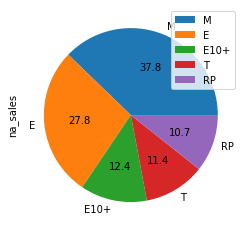

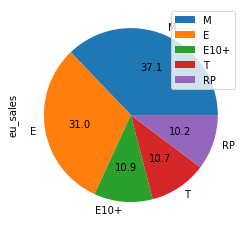

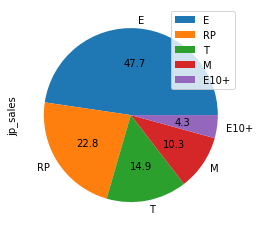

In [ ]:
display(data_cut.pivot_table(index='rating',values='na_sales',aggfunc='sum').\
        sort_values(by='na_sales',ascending=False)[:5])
data_cut.pivot_table(index='rating',values='na_sales',\
                                               aggfunc='sum').sort_values(by='na_sales',ascending=False)[:5].plot.pie(y='na_sales',autopct='%.1f')
print('Всего продаж:',data_cut.pivot_table(index='rating',\
                                                                     values='na_sales',aggfunc='sum').\
      sort_values(by='na_sales',ascending=False)[:5].sum())



display(data_cut.\
        pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)[:5])
data_cut.pivot_table(index=\
                                               'rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)[:5].plot.pie(y='eu_sales',autopct='%.1f')
print('Всего продаж',data_cut.pivot_table(index='rating',values='eu_sales',aggfunc='sum').\
      sort_values(by='eu_sales',ascending=False)[:5].sum())



display(data_cut.pivot_table(index='rating',values='jp_sales',\
                                                       aggfunc='sum').sort_values(by='jp_sales',ascending=False)[:5])
data_cut.pivot_table(index='rating',\
                                               values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)[:5].plot.pie(y='jp_sales',autopct='%.1f')
print('Всего продаж',data_cut.\
      pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)[:5].sum())


    
В Америке и в Европе самой популярной категорией является M, 37.8% и 37.1% продаж соответственно. В Японии самая популярная категория - категория E(47.7%).
    
Наименее популярные категории в Америке, Европе - RP (10.7%, 10.2%) и в Японии - E10+ (4.3%).

### Проверка гипотез

$H_0$: Средние пользовательские рейтинги платформ xone и pc одинаковые

$H_1$: Средние пользовательские рейтинги платформ xone и pc отличаются

In [ ]:
user_score_xone = data[data['platform']=='xone']['user_score']
user_score_pc = data[data['platform']=='pc']['user_score']



alpha = 0.05

results = st.ttest_ind(user_score_xone,user_score_pc)

print(results.pvalue,user_score_xone.mean(), user_score_pc.mean())

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')



0.00015084258116670427 6.716444444444445 7.113679808841098
Отвергаем нулевую гипотезу


По результатам теста средние пользовательские рейтинги платформ xone и pc не равны.

Среднее значение для рейтинга платфомы xone примерно равен 6.76, для pc - 7.17.

$H_0$: Средние пользовательские рейтинги жанров action и sports одинаковые

$H_1$: Средние пользовательские рейтинги жанров action и sports разные

In [ ]:
user_score_action = data[data['genre']=='action']['user_score']
user_score_sports = data[data['genre']=='sports']['user_score']

results = st.ttest_ind(user_score_action,user_score_sports)

print(results.pvalue,user_score_action.median(),user_score_sports.median())

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')


0.6544561328272527 7.4 7.4
Нет оснований отвергать нулевую гипотезу


Среднее значение для пользовательских рейтингов для жанров action и sports совпадают, поэтому отвергаем гипотезу о том, что они разные.

Для проверки гипотез используем тест ttest_ind, потому что сравниваем средние двух генеральных совокупностей.

### Вывод

Было проведено исследование по выявлению факторов, влияющих на продажи игр. В ходе работы были выявлены следующие закономерности:

 - Пик популярности игр пришелся на промежуток времени между 2005 и 2010 годами, после чего продажи игр начали падать. С примерно 2010-ого года до 2016-ого продажи игр на некоторых платформах могли упасть в десятки раз.
 - За актуальный период было решено взять промежуток от 2013-ого по 2016-ый, поскольку в этот период наблюдается больше всего платформ, и наблюдается явное падение количества продаж.
 - Самой популярной платформой на 2016 год является ps4 - 68.93 миллионов продаж, у xone на 2016 год 25.95 миллионов продаж, у 3ds - 15.06 миллионов. Эти платформы можно считать наиболее прибыльными.
 - Чем выше оценки критиков, тем больший успех имеют игры, коэффициент корреляции не меньше 0.3 для продаж и оценок критиков. Оценки пользователей почти никак не влияют на успешность игры, для них коэффициент корреляции близок к нулю.
 - Медианы выше всего у жанров platform, shooter, sports (0.25, 0.5, 0.3 миллионов соответственно).
 - Самой популярной платформой в Северной Америке является ps4, состовляет примерно 28.2 процентов от продаж игр на пяти самых популярных платформах. В Европе самая популярная платформа - ps4, составляет 42.3 процента, в Японии - 3ds, состовляет 50.4 процента.
 - В Северной Америке и Европе самым популярным жанром является action (36.6%, 36.4%), в Японии - role-playing  44.9%.
 - В Америке и в Европе самой популярной категорией является M, 37.8% и 37.1% продаж соответственно. В Японии самая популярная категория - категория E(47.7%).

Также были сформулированы и проверены следующие гипотезы:

1) Средние пользовательские рейтинги платформ xone и pc одинаковые

Эту гипотезу пришлось отвергнуть, так вероятность получить одинаковые значения на данных много меньше 0.05. При этом средняя пользовательская оценка платформы xone меньше средней оценки pc.

2) Средние пользовательские рейтинги жанров action и sports одинаковые

Нет оснований отвергнуть эту гипотезу.

Таким образом, потенциально популярные игры будут для платформ ps4, xone или 3ds, жанр либо platform, либо shooter, либо sports возрастной категории либо E, либо M. Причем, чем выше оценки критиков, тем больше вероятность того, что игра будет успешна.

В качестве рекомендации можно было бы дать игры как fifa 16, destiny	, uncharted 4: a thief's end, call of duty: advanced warfare, halo 5: guardians.

In [ ]:
data_cut[((data_cut['platform']=='ps4')|(data_cut['platform']=='xone')|(data_cut['platform']=='3ds'))&((data_cut['genre']=='platform')|(data_cut['genre']=='shooter')|(data_cut['genre']=='sports'))&((data_cut['rating']=='E')|(data_cut['rating']=='M'))].sort_values(by='total_income',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income,game_category
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,higher
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,higher
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,higher
143,fifa 15,ps4,2014,sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08,high
179,call of duty: advanced warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13686,spongebob: heropants,3ds,2015,platform,0.03,0.00,0.00,0.00,85.0,7.4,E,0.03,low
13940,tour de france 2014,ps4,2014,sports,0.00,0.03,0.00,0.00,53.0,5.1,E,0.03,low
14607,mx vs. atv supercross encore,xone,2015,sports,0.02,0.00,0.00,0.00,45.0,7.4,E,0.02,low
14689,duke nukem 3d: 20th anniversary world tour,xone,2016,shooter,0.02,0.00,0.00,0.00,70.0,7.4,M,0.02,low
